# Scenario: estimate the gas consumption of your car

Measure your car's MPG at a few different speed and outside temparature, and slope (on high ways) --> data

Goal: make prediction of your car's MPG in other situations



Learning objectives:

* Know how to setup an interpolation problem: 
        give paired data (x_j,y_j), j=1,2,... construct a function that interpolates the data
        
* Know Lagrange and Newton interpolation formulas for 1D
* Know the errors of polynomial interpolations

# Interpolations

* Data points are pairing between coordinates, $x_j\in\mathbb{R}^d$ and values $y_j$. 
* The values can come from some function and it's derivatives
* **Interpolation** is used to approximate the assumed "underlying function", denoted here by $f$,

* an interpolation scheme produces an **interpolant** $f_{int}(x)$ which is used to approximate $f$.

* Most commonly in this class,  $y_j$ only corresponds to $f(x_j)$, then the **interpolant** $f_{int}$ has to agree with $y_j$:
$$f_{int}(x_j)=y_j,~~~j=0,1,2,3,\cdots,N$$

* If some of $y_j$ corresponds to the derivative of $f$, we have a **Hermite interpolation** problem.
* In many applications, it is more common to construct **piecewise interpolation** with polynomials. This means the overall interpolation is constructed by "glueing" pieces of interpolants together. This is the practice of cubic splines and finite element methods (in multiple dimensions).

#### Special example: Taylor's expansion

Data: $(x_0, f(x_0), (x_0, f^\prime(x_0)), (x_0, f^\prime(x_0))$

* Taylor's series constructs a polynomial that interpolate the data. E.g. quadratic interpolant:

$$ f_{int}(x) = f(x_0) + (x-x_0)f^\prime(x_0) + \frac{(x-x_0)^2}{2}f^{\prime\prime}(x_0) $$

## General setup

* Basis functions $$\phi_0(x), \phi_1(x),\cdots,\phi_N(x)$$

* The interpolant as a linear combination of the basis function 
$$f_{int}(x):= a_0 \phi_0(x)+a_1 \phi_1(x)+\cdots+a_N\phi(x)$$

* Consider interpolating the values of $f$, we arrive at the linear system to solve:

$$\left(\begin{array}{cccc}
\phi_{0}(x_{0}) & \phi_{1}(x_{0}) & \cdots & \phi_{N}(x_{0})\\
\phi_{0}(x_{1}) & \phi_{1}(x_{1})\\
\vdots & \vdots\\
\phi_{0}(x_{N}) & \phi_{1}(x_{N}) & \cdots & \phi_{N}(x_{N})
\end{array}\right)\left(\begin{array}{c}
a_{0}\\
a_{1}\\
\vdots\\
a_{N}
\end{array}\right)=\left(\begin{array}{c}
y_{0}\\
y_{1}\\
\vdots\\
y_{N}
\end{array}\right)$$


### Does interpolation of noisy data make sense?

### Degree of polynomials and number of data points

Interpolating many ($M$) data points by polynomial of degress $N$ where 

* $M>N-1$ is an *over-determined* problem (more equations than the number of unknowns). In general, one cannot find solution for such problems.
    * Consider: least square fitting problem

* $M<N-1$ is an *under-determined* problem. There could be no solution or infinite number of solutions.
    * Consider interpolation with additional constraints on the interpolant. For example, find an interpolant that has the smallest derivative in the $L^2$ norm.


## Special approaches

A portrait of Lagrange: https://en.wikipedia.org/wiki/Joseph-Louis_Lagrange#/media/File:Lagrange_portrait.jpg 

A portrait of Newton: https://en.wikipedia.org/wiki/Isaac_Newton#/media/File:GodfreyKneller-IsaacNewton-1689.jpg

### Lagrange and Newton interpolation schemes -- *BUILD basis functions around data points*

* Lagrange polynomials:  $\phi_j(x)$ created so that $\Phi$ is a diagonal matrix: $\Phi=diag( y_j)$
* Newton's polynomials:  $\phi_{j+1}(x)$ is built on top of $\phi_j(x)$, and $\Phi$ is a triangular matrix (so it is trivial to invert).

* Lagrange interpolation and Newton Interpolation will produce *the same* interpolating polynomials for the same data. 
* It's just that this interpolating polynomial is written in two different ways!

### Interpolation using orthogonal polynomials

* "orthogonality" is defined by some notion of inner product.

* Examples of orthogonal polynomials: **Legendre polynomials, Chebyshev polynomials**; they are *orthogonal* under different inner products.

### Interpolation using trigonometric functions

* **Fast Fourier Transform (FFT)** is used to invert the matrix


## Dimension-by-dimension interpolation in higher dimensions

* E.g. bilinear interpolation on a square domian in two dimensions

In [2]:
using Plots #documentation: http://docs.juliaplots.org/latest/tutorial/ 

# Lagrange polynomials

In [3]:
# Given data points coordinates, x, evaluate the ith Lagrange basis polynomial at z
function LagrangePoly(x, i, z)
    
    L=zeros(size(z,1))
    
    for j=1:length(z)
        L[j]=prod( (z[j].-x[1:i-1])./(x[i].-x[1:i-1]))*prod( (z[j].-x[i+1:end])./(x[i].-x[i+1:end]))
    end
    
    return L
end

LagrangePoly (generic function with 1 method)

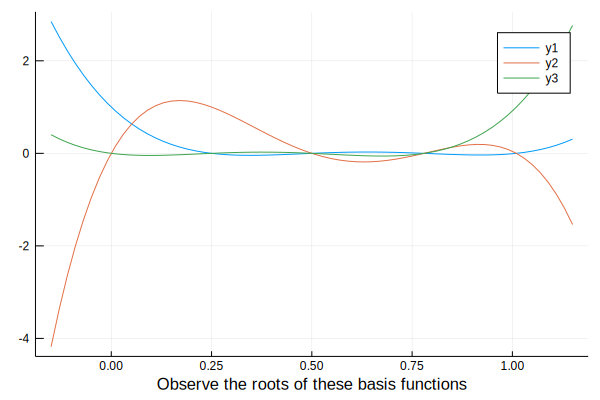

In [16]:
x = [0.0 0.25 0.5 0.78 1.01]

y = exp.(x)

z = collect(-0.15:0.02:1.15)

L1=LagrangePoly(x,1, z)
L2=LagrangePoly(x,2, z)
L3=LagrangePoly(x,3, z)
L4=LagrangePoly(x,4, z)
L5=LagrangePoly(x,5, z)


plot(z, [L1, L2, L5], xlabel="Observe the roots of these basis functions")

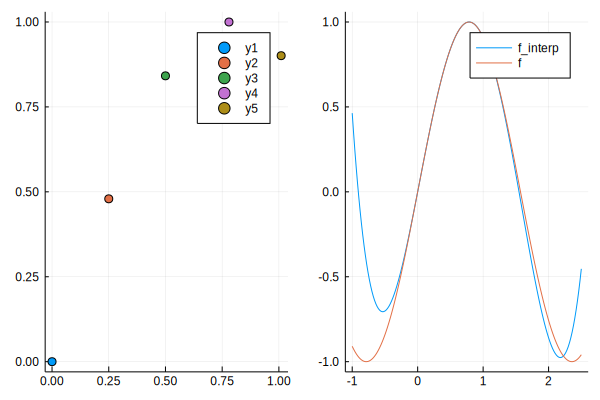

In [5]:
f(x)= sin(2x) 

#generate data
x = [0.0 0.25 0.5 0.78 1.01]
y = f.(x)

z = -1.0:0.02:2.5

L1=LagrangePoly(x,1, z)
L2=LagrangePoly(x,2, z)
L3=LagrangePoly(x,3, z)
L4=LagrangePoly(x,4, z)
L5=LagrangePoly(x,5, z)

f_interp=y[1]*L1+y[2]*L2+y[3]*L3+y[4]*L4+y[5]*L5

p1=plot(x,y, seriestype=:scatter)
p2=plot(z,[f_interp f.(z)], label=["f_interp" "f"])
    
plot(p1,p2)

### Verify that the interpolant is exact if the data come from a polynomial of degree $\le N$

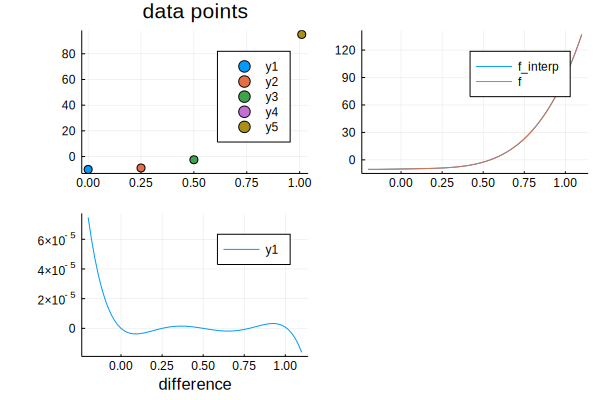

In [6]:
f(x)= 1e-3*x^5+100.0*x^4-2.0*x^3+3.0*x-10.0 

#generate data
x = [0.0 0.25 0.5 0.78 1.01]
y = f.(x)

z = collect(-.2:0.02:1.1)

L1=LagrangePoly(x,1, z)
L2=LagrangePoly(x,2, z)
L3=LagrangePoly(x,3, z)
L4=LagrangePoly(x,4, z)
L5=LagrangePoly(x,5, z)

f_interp=y[1]*L1+y[2]*L2+y[3]*L3+y[4]*L4+y[5]*L5

p1=plot(x,y, seriestype=:scatter, title="data points")
p2=plot(z,[f_interp f.(z)], label=["f_interp" "f"])
p3=plot(z,[f_interp-f.(z)], xlabel="difference")

    
plot(p1,p2,p3)

### Runge phenomenon

* Interpolation using high order polynomials are not useful in general

* Interpolate at judiciously chosen nodes in an interval; e.g. the roots of Chebyshev's polynomial, appropriately scaled and translated


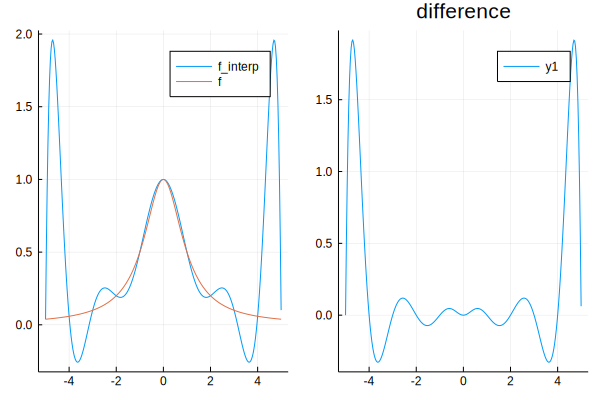

In [7]:
f(x)= 1/(1 +x^2)

#generate data
N=10.0
x = -5.0:10.0/N:5.0

y = f.(x)

N=100
z = -5.0:10.2/(N*3):5.0

#add noise
y=y .+0.0*rand(size(y))

L=zeros(length(z), length(x))
for m=1:length(y)  
    L[:,m]=LagrangePoly(x,m, z)
end

f_interp=L*y

p1=plot(z, [f_interp f.(z)], label=["f_interp" "f"])
p2=plot(z, f_interp-f.(z),title="difference")

plot(p1,p2)

# Newton interpolation

$$\phi_0(x):=1,$$
$$\phi_k(x):=\prod_{j=0}^{k-1}(x-x_j)$$

$$\left(\begin{array}{cccc}
1 & 0 & 0 & \cdots\\
1 & (x_{1}-x_0)& 0\\
\vdots & \vdots\\
1 & (x_{N}-x_0) & \cdots & \phi_{N}(x_{N})
\end{array}\right)\left(\begin{array}{c}
a_{0}\\
a_{1}\\
\vdots\\
a_{N}
\end{array}\right)=\left(\begin{array}{c}
y_{0}\\
y_{1}\\
\vdots\\
y_{N}
\end{array}\right)$$

This leads to recursively defined interpolants:

$$P_k(x) := a_0 +a_1\phi_1(x)+\cdots+a_k\phi_k(x) = P_{k-1}(x)+a_k\phi_k(x),$$

* $f[x_j]:=f(x_j)$

* $a_0=f(x_0)=f[x_0]$

* $a_1=f[x0,x1]:=\frac{f[x_1]-f[x_0]}{x_1-x_0}$

* $a_2=f[x_0,x_1,x_2]:=\frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$

$$a_k=f[x_0,x_{1},\ldots,x_{k}]:=\frac{f[x_{1},\ldots,x_{k}]-f[x_{0},\ldots,x_{k-1}]}{x_{k}-x_0}$$

### Important facts

* The order of the data points makes no difference.
* **Convenient** when additional data points are given to be interpolated with existing ones.
* **Convenient expression for the interpolation error**: 
    If we add an *arbitrary* new data point $(x, f(x))$, the new interpolant, evaluated at the new data point, is related to the existing interpolant $f_{int}^N$ using $N$ data points is exactly:
    $$ f(x) = f_{int}^N(x)+ f[x_0,x_1,\cdots,x_N, x]\prod_{j=0}^N (x-x_j). $$
    In other words, the error in using $f_{int}^N(x)$ to approximate $f(x)$ is precisely
    $$  e_{int}^N:=f(x) - f_{int}^N(x) \equiv f[x_0,x_1,\cdots,x_N, x]\prod_{j=0}^N (x-x_j). $$
    

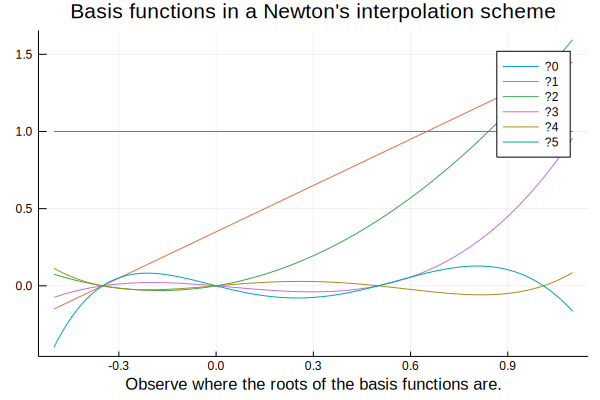

In [11]:
f(x)= 1e2*x^5+100.0*x^4-2.0*x^3+3.0*x-10.0 

#generate data
x = [-0.35 0.0 0.5 1.01 3.01]
y = f.(x)

z = -.5:0.01:1.1

#Evaluating Newton's polynomials at z
ϕ0=ones(size(z))
ϕ1=(z.-x[1])
ϕ2=ϕ1.*(z.-x[2])
ϕ3=ϕ2.*(z.-x[3])
ϕ4=ϕ3.*(z.-x[4])
ϕ5=ϕ4.*(z.-x[5])

#interpolant of different orders, built successively

a0=f(x[1])
P0=a0*ϕ0

#computing the divided differences
a1   =(f(x[2])-f(x[1]))/(x[2]-x[1]) # f[x0, x1],  x0=x[1], x1=x[2]
a1p  =(f(x[3])-f(x[2]))/(x[3]-x[2]) # f[x1, x2]
a1pp =(f(x[4])-f(x[3]))/(x[4]-x[3]) # f[x3, x2]
a1ppp=(f(x[5])-f(x[4]))/(x[5]-x[4])

P1=P0+ a1*ϕ1

#computing the divided differences
a2  =(a1p -a1 )/(x[3]-x[1])  # f[x0,x1,x2]:= (f[x2,x1]-f[x1,x0])/(x2-x0)
a2p =(a1pp-a1p)/(x[4]-x[2])  # f[x1,x2,x3]:= (f[x3,x2]-f[x2,x1])/(x3-x1)
a2pp=(a1ppp-a1pp)/(x[5]-x[3])

P2=P1+ a2*ϕ2

#computing the vided differences
a3 = (a2p-a2)/(x[4]-x[1]) #f[x0,x1,x2,x3]:= 
a3p= (a2pp-a2p)/(x[5]-x[2])

P3=P2+ a3*ϕ3

#
a4 = (a3p-a3)/(x[5]-x[1])  #f[x0,x1,x2,x3,x4]

P4 = P3+a4*ϕ4

basisfns= plot(z, [ϕ0 ϕ1 ϕ2 ϕ3 ϕ4 ϕ5], 
    label=["ϕ0" "ϕ1" "ϕ2" "ϕ3" "ϕ4" "ϕ5"], 
    xlabel="Observe where the roots of the basis functions are.", 
    title = "Basis functions in a Newton's interpolation scheme")

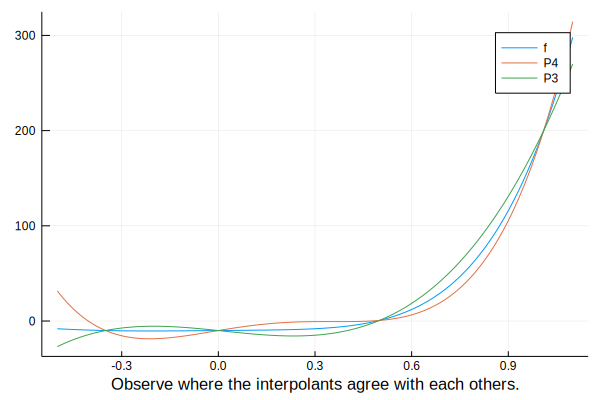

In [12]:
interps = plot(z, [f.(z) P4 P3], 
    label=["f" "P4" "P3"], 
    xlabel="Observe where the interpolants agree with each others.")

### More general code for building divided differences for use in the Newton interpolation scheme

In [13]:
#computes the divided differences for interpolation of the data (x,f)
#D is a NxN matrix, where N=length(x)=length(f)
function NewtonInterpTable!(D::Array{Float64,2}, x, f)

  n=length(x)-1
  for i=1:n+1
        @inbounds D[i,1]  =f[i]
    for j=1:i-1
            @inbounds D[i,j+1]= (D[i,j]-D[i-1,j])/(x[i]-x[i-j])
    end
  end

end

#computes the divided differences for interpolation of the data (x,f)
#D is a Nx1 matrix, where N=length(x)=length(f)
function NewtonInterpCoeffs!(D, x, f)
    
    n=length(x)

    for i=1:n
        @inbounds D[i]  =f[i] 
    end

    for j=2:n
        for i=n:-1:j
            @inbounds D[i]= (D[i]-D[i-1])/(x[i]-x[i-j+1])
        end
    end

end

#coeffs[] stores the divided differences of f: coeffs[1]=f[1], coeffs[2]=f[ x[1], x[2] ], etc.
function NewtonInterp(x,coeffs, z)
    n=length(x)-1
    
    f=zeros(size(z))
    @inbounds f.=coeffs[n+1]
    
    #notice that the summation goes "backward" from high order divided differences to lower order ones
    for k=1:length(z)
    for i=n:-1:1
        @inbounds f[k]= f[k]*(z[k]-x[i])+coeffs[i]
    end
    end
    
    return f
end

NewtonInterp (generic function with 1 method)

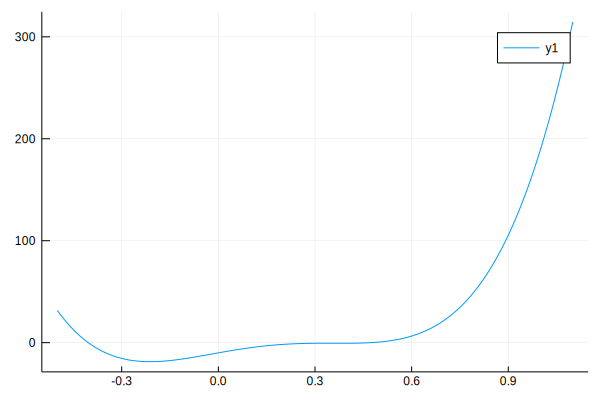

In [14]:
x = [-0.35 0.0 0.5 1.01 3.01]
y = f.(x)

z = -.5:0.01:1.1

D=copy(y)

NewtonInterpCoeffs!(D, x, y)

fint = NewtonInterp(x, D, z)
plot(z,fint)

# Multidimensional inteprolation by radial basis functions

Let $x_1, \cdots, x_N\in\mathbb{R}^m$ and 
$y_1,\cdots,y_N\in\mathbb R$ be the data points to be interpolated.

We consider the basis functions to be
$$\phi_j(x) := \phi(x, x_j)=e^{-\sigma |x-x_j|^2},\ \ \ i=,\cdots,N.$$

The linear system for interpolationof the data is: 
$$ \sum_{j=1}^N c_j \phi(x_i, x_j) =y_i \iff \Phi c = y $$

If we are going to evaluate the interpolatant at the locations $z_1,z_2,\cdots,z_M$, we can write the whole operation conveniently as
$$ f_{int}(z_i) := \sum_{j=1}^N c_j \phi(z_i, x_j) \iff \Phi_s\Phi^{-1} y $$
where $\Phi_s$ denotes the matrix
$$(\Phi_s)_{i,j} =\phi(z_i, x_j).$$

## Approximation by Gaussian processes

Suppose $y_j=f(x_j)+\epsilon,j=1,2,\dots,N,$ where $\epsilon$ is *additive independent identically distributed Gaussian noise* with variance $\sigma_n^2$.

Gaussian processes "interpolate" the noisy data by the following formula:

* The mean function written in the matrix-vector form: 
$$\bar{f}= \Phi_s (\Phi+\sigma_n^2 I)^{-1} y,\,\,\,\, \Phi_s\in\mathbb{R}^{M\times N},\Phi\in\mathbb{R}^{N\times N}.$$

* On top of the mean function, a random variation with a prescribed variance is added. 

$$ f_{int}(z_i) := \bar{f}(z_i) + \sum_{j=1}^N B_{i,j}\ \xi,\, \, \xi\sim\mathcal{N}(0,1) $$

$$ BB^T = \Phi_{ss}-\Phi_s (\Phi+\sigma_n^2 I)^{-1} \Phi_s^T,\,\,\, \Phi_s\in\mathbb{R}^{M\times M},$$
where $B$ is lower triangular, and 
$$ (\Phi_{ss})_{i,j}:=\phi(z_i, z_j),   i,j=1,2,\cdots,M.$$


## Experiments with simple Gaussians in 2D

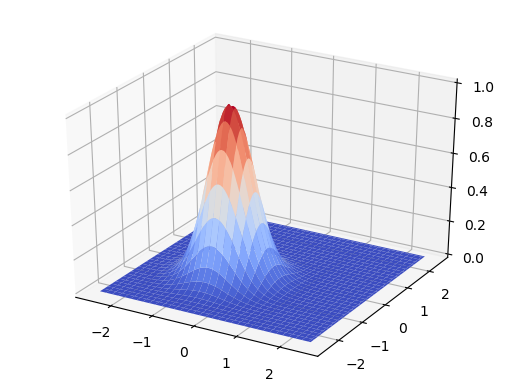

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x1519570b8>

In [30]:
using PyPlot
pygui(false)


meshgrid(xs, ys) = [xs[i] for i in 1:length(xs), j in 1:length(ys)], [ys[j] for i in 1:length(xs), j in 1:length(ys)]

ϕ(x,y, xc, yc; σ=2.1) = exp.(-σ*((x.-xc).^2+(y.-yc).^2))

f(x,y)=ϕ(x,y,-0.5,-0.5)

x = y = range(-2.5, stop=2.5, length=101)

#equivalent to Matlab's meshgrid
xgrid,ygrid=meshgrid(x,y)

F=f.(xgrid, ygrid)

p0 = surf(x,y,F, cmap="coolwarm")


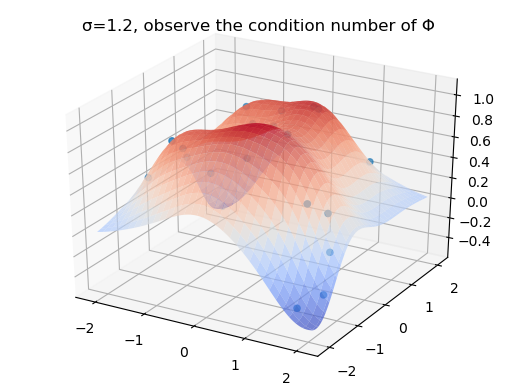

For N=20 the condition number of Φ is 457.40300074292736


PyObject Text(0.5, 0.92, 'σ=1.2, observe the condition number of Φ')

In [45]:
using LinearAlgebra

#randomly generate some data points
Xdata=4.0.*(rand(20,2).-0.5)
Ydata=cos.( 0.3*(Xdata[:,1].^2+Xdata[:,2].^2) )

#assemble the interpolation matrix
N=size(Xdata,1)
Φ=zeros(N,N)
σ=1.2 #the larger this value is, the "thinner" the basis function becomes

for i=1:N
    Φ[:,i] .= ϕ(Xdata[:,1],Xdata[:,2],Xdata[i,1],Xdata[i,2], σ=σ)
end

#find the weights for the interpolant: 
coeffs=Φ\Ydata

#observe the condition number of the matrix Φ
println("For N=", N, " the condition number of Φ is ", cond(Φ))

#now evaluating the interpolant on a grid
x = y = range(-2.1, stop=2.1, length=101)

#equivalent to Matlab's meshgrid
xgrid,ygrid=meshgrid(x,y)

Finterp=zeros(size(xgrid))

for i=1:size(xgrid,1), j=1:size(ygrid,1)
        for k=1:N
            Finterp[i,j]+=coeffs[k]*ϕ(xgrid[i,j],ygrid[i,j],Xdata[k,1],Xdata[k,2], σ=σ)
        end
end

pygui(false)

#visualize the data set
scatter3D( Xdata[:,1], Xdata[:,2], Ydata[:])

#plot out the interpolant
surf(xgrid, ygrid, Finterp, cmap="coolwarm", alpha=0.7)
title("σ=1.2, observe the condition number of Φ")

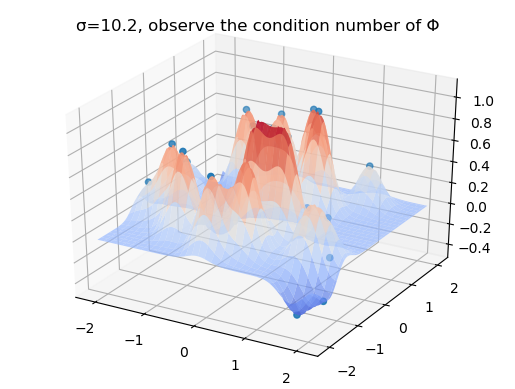

For N=20 the condition number of Φ is 3.7933289293062806


PyObject Text(0.5, 0.92, 'σ=10.2, observe the condition number of Φ')

In [46]:
σ=10.2 #the larger this value is, the "thinner" the basis function becomes

for i=1:N
    Φ[:,i] .= ϕ(Xdata[:,1],Xdata[:,2],Xdata[i,1],Xdata[i,2], σ=σ)
end

#find the weights for the interpolant: 
coeffs=Φ\Ydata

#observe the condition number of the matrix Φ
println("For N=", N, " the condition number of Φ is ", cond(Φ))


Finterp=zeros(size(xgrid))

for i=1:size(xgrid,1), j=1:size(ygrid,1)
        for k=1:N
            Finterp[i,j]+=coeffs[k]*ϕ(xgrid[i,j],ygrid[i,j],Xdata[k,1],Xdata[k,2], σ=σ)
        end
end

pygui(false)

#visualize the data set
scatter3D( Xdata[:,1], Xdata[:,2], Ydata[:])

#plot out the interpolant
surf(xgrid, ygrid, Finterp, cmap="coolwarm", alpha=0.7)
title("σ=10.2, observe the condition number of Φ")

#### Observation

* With a fixed number of data points
    * Observe the quality of interpolation with different values of $\sigma$. 
    * Observe the condition number of $\Phi$ as $\sigma$ increases.

* With a fixed $\sigma$
    * Observe the condition number of $\Phi$ with different number of data points.


### Hermite interpolation using the cubic Hermite polynomials

Objective 1: given data $(x1=0, y1=f(x1), p1=f^\prime(x1) )$ and $(x2=1, y2=f(x2), p2=f^\prime(x2) )$, construct a cubic polynomial $P(t)$ such that
* $P(x1)=y1, P(x2)=y2$
* $P^\prime(x1)=p1, P^\prime(x2)=p2 $

This will be accomplished by the **cubic Hermite polynomials**

Objective 2: Learn how to *translate* and *scale" the Hermite polynomials to construct cubic interpolation in other intervals.

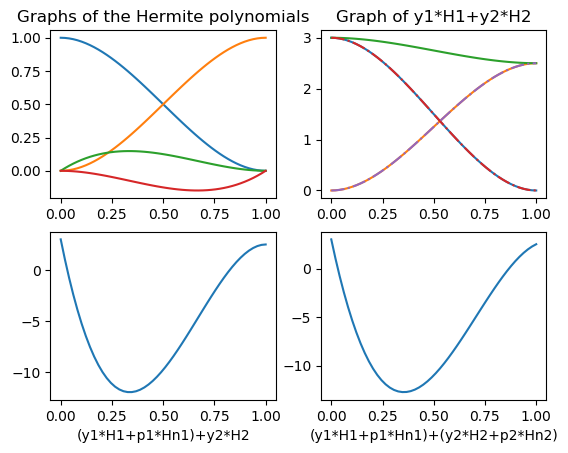

H1(t), H2(t) imterpolate values at t=0 and t=1.
Hn1(t), Hn2(t) imterpolate derivatives at t=0 and t=1.


PyObject Text(0.5,24,u'(y1*H1+p1*Hn1)+(y2*H2+p2*Hn2)')

In [5]:
using PyPlot

H1(t)=1-3t^2+2t^3 #implements H^3_0(t) in the book
H2(t)=3t^2-2t^3 #implements H^3_1(t) in the book

Hn1(t)=t-2t^2+t^3 #implements H^3_3(t)
Hn2(t)=-t^2+t^3 #implements H^3_2(t)

println("H1(t), H2(t) imterpolate values at t=0 and t=1.")

println("Hn1(t), Hn2(t) imterpolate derivatives at t=0 and t=1.")



t=linspace(0,1,50)

subplot(2,2,1)
plot(t, [H1.(t) H2.(t) Hn1.(t) Hn2.(t)])
title("Graphs of the Hermite polynomials")

subplot(2,2,2)
y1, y2=3.0, 2.5 #so the data points (0, y1=f(0), p1=f'(0)) and 
                 #                   (1, y2=f(1), p2=f'(1))

plot(t, [y1*H1.(t) y2*H2.(t) y1*H1.(t)+y2*H2.(t)])
plot(t, [y1*H1.(t) y2*H2.(t)], "-.")
title("Graph of y1*H1+y2*H2")

subplot(2,2,3)
p1=-100.0
plot(t, y1*H1.(t)+y2*H2.(t)+p1*Hn1.(t))
xlabel("(y1*H1+p1*Hn1)+y2*H2")

subplot(2,2,4)
p2=10.0
plot(t, y1*H1.(t)+y2*H2.(t)+p1*Hn1.(t)+p2*Hn2.(t))
xlabel("(y1*H1+p1*Hn1)+(y2*H2+p2*Hn2)")

#### Use translated and scaled version of the cubic Hermite polynomials


$$ h_i := x_{i+1}-x_i $$
$$P_i(x_i+th_i) = \left(f_i H_1(t) + h_i f^\prime_i H_n^1 (t) \right) + \left(f_{i+1} H^2(t) + h_i f^\prime_{i+1} H_n^2 (t) \right)$$

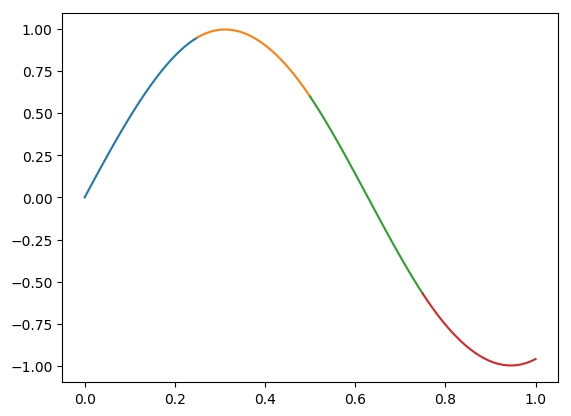

In [8]:
using PyPlot

#generate some data points

f(x)=sin(5x)
df(x)=5.0*cos(5x)

x=linspace(0,1,5)
h = x[2]-x[1]

#the data points to interpolate are then:
# (x[j], f(x[j]), df(x[j])), j=1,2,3,4,5

#generate points used to plot the cubic Hermite interpolation
t=linspace(0,1,25)

#plotting the cubic Hermite interpolation piece-by-piece
for i=1:length(x)-1
    X=x[i]+t*h
    
    plot(X, ( f(x[i])*H1.(t)+ df(x[i])*h*Hn1.(t) ) + (f(x[i+1])*H2.(t) +df(x[i+1])*h*Hn2.(t) )   )
end


In [ ]:
    subplot(1,2,1)
    plot(X, f(x[i])*H1.(t).+f(x[i+1])*H2.(t) )
    plot(X, f.(x[i]+h*t), "r-." )

    subplot(1,2,2)
    plot(X, f(x[i])*H1.(t).+f(x[i+1])*H2.(t) + h*(df(x[i])*Hn1.(t).+df(x[i+1])*Hn2.(t)) )  
    title("Piecewise Cubic Hermite interpolation")

### Error in cubic Hermite interpolation

Theorem 3.9 (Burden anf Faires)
$$f(x)=f_{int}(x)+\frac{(x-x_0)^2(x-x_1)^2}{3!}f^{(4)}(\xi(x))$$

## Piecewise interpolation by polynomials

**Objective**: compute cubic polynomial interpolations in the intervals $[x_i,x_{i+1}]$ so that the overlapping interpolants have the same values and derivatives on points where they overlap.

Data to be interpolated: $(x0,y0),(x_1,y_1),\cdots,(x_N,y_N)$, where $y_j$ come from $f(x_j)$, and we would like to approximate $f(x)$ by the constructed interpolant.

Let $P_j(x)$ be the cubic polynomial interpolant for the interval $[x_j,x_{j+1}]$. They are uniquely determined 
by the following conditions:

Continuity constraints: 

$P_j(x_{j})= P_{j-1}(x_j)$  

$P_j(x_{j+1})=P_{j+1}(x_{j+1})$ 

$P_j^\prime(x_{j+1})=P_{j+1}^\prime(x_{j+1})$

$P_j^"(x_{j+1})=P_{j+1}^"(x_{j+1})$


    **Four conditions implies the use of cubic polynomials**

Boundary conditions: 

* "clamped splines": $P_0(x_0)=f_0, P^\prime_0(x_0)=f^\prime_0 $ and  $P_N(x_N)=f_N,\, \, P^\prime_N(x_)=f^\prime_N$.

* "natural cubic splines": $P_0(x_0)=f_0, P^"_0(x_0)=0 $ and  $P_N(x_N)=f_N,\, \, P^"_N(x_N)=0.$
    
Depending on which basis functions one uses to form $P_j(x)$, one will arrives at different **tri-diagonal** linear systems to solve.

See the examples below.

#### Simple basis functions

See Burden-Faires

For convenience, let $x_{j+1}=x_j+h_j$.

The basis functions: 
    $$P_j(x)=a_j+b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3\implies a_j=y_j=f(x_j)$$
and their derivatives:
    $$P^\prime_j(x)=b_j+2c_j(x-x_j)+3d_j(x-x_j)^2\implies P^\prime(x_j)=b_j$$

From the constraints:
$$P_j(x_{j+1}) = P_{j+1}(x_{j+1}) \implies a_j+b_j h_j+c_j h_j^2+d_j h_j^3=a_{j+1}$$
$$P_j^\prime(x_{j+1}) = P_{j+1}^\prime(x_{j+1}) \implies b_j+2c_j h_j+3 d_j h_j^2=b_{j+1}$$
$$P_j^"(x_{j+1}) = P_{j+1}^"(x_{j+1}) \implies 2c_j +6 d_j h_j=2c_{j+1}$$

Use these relations to rewrite $a_j, b_j, d_j$ as functions of $c_j, c_{j+1}$, one derives 

$$ x=[c_0, c_1,\cdots, c_N]'$$

#### Basis functions: Cubic Hermite polynomials on unit intervals

Following Gander-Gander-Kwok, Sec 4.3.1.

$$ h_i := x_{i+1}-x_i $$

$P_j(x):= Q(\frac{x-x_j}{h_j})$, in particular, 

$$P_i(x_i+th_i) = \left(y_i H_1(t) + h_i y^\prime_i H_n^1 (t) \right) + \left(y_{i+1} H^2(t) + h_i y^\prime_{i+1} H_n^2 (t) \right)$$

**The unkowns here are the derivatives at the internal nodes: $y^\prime_j,\,\,\, j=1,2,\cdots,N-1$.**

* "defective splines" are constructed *if the derivatives $P^\prime(x_j)$ are estimated* by neighboring data points; e.g. by $(x_{j-1},y_{j-1})$ and $(x_{j+1}, y_{j+1})$  and $$ P^\prime(x_j)\approx (y_{j+1}-y_{j-1})/(x_{j+1}-x_{j-1}). $$
In this case, we do not need to invert a matrix. A formula for the resulting spline function can be written explicitly.

#### Setup the matrix to compute the classical spine function

($Q$ actually depends on the data points in a simpler way. For clarity of our presentation, we 
do not explicit write out this dependency)

$P_j^"(x) = \frac{1}{h_j} Q^"(\frac{x-x_j}{h_j}) \implies P_j^"(x_{j+1})=\frac{1}{h_j} Q^"(1),\,\,\,  P_{j+1}^"(x_{j+1})=\frac{1}{h_{j+1}} Q^"(0)$

$Q(t)= y_j (-6+12t)+y_{j+1}(6-12t)+h_jy_+j^\prime(-4+6t)+h_jy_{j+1}^\prime(-2+6t)$

$ Q^"(0) = 6(y_{j+2}-y_{j+1})-4h_{j+1}y_{j+1}^\prime -2h_{j+1}y_{j+2}^\prime $

$ Q^"(1) = 6(y_{j}-y_{j+1})+4h_{j}y_{j+1}^\prime +2h_{j}y_{j+1}^\prime $

$ P_j^"(x_{j+1})=\frac{1}{h_j} Q^"(1) = P_{j+1}^"(x_{j+1})=\frac{1}{h_{j+1}} Q^"(0) \implies $

For $j=0,1,2,3,\cdots,N-2:$

$$ \frac{2}{h_j} y_j^\prime+4\left(\frac{1}{h_j}+\frac{1}{h_{j+1}}\right)y^\prime_{j+1}+\frac{2}{h_{j+1}}y^\prime_{j+2} = -\frac{6}{h_j^2} y_j+6\left(\frac{1}{h_j^2}-\frac{1}{h_{j+1}^2}\right)y_{j+1}+\frac{6}{h_{j+1}^2}y_{j+2}$$ 

Abstractly, this leads to $$A p= B y+c,\,\, p=[y_0^\prime, y_1^\prime,\cdots,y_{N-2}^\prime]',y=[y_0,y_1,\cdots,y_{N-2}]'$$
$c$ comes form teh boundary conditions. For example:

* Natural spline: $P^"(x_0) =P^\prime(x_N)=0$

$$ \frac{2}{h_0}y^\prime_0+\frac{1}{h_0} y^\prime_1 = 3\frac{y_1-y_0}{h_0} $$

$$ \frac{1}{h_{N-1}}y^\prime_{N-1}+\frac{2}{h_{N-1}} y^\prime_N = 3\frac{y_N-y_{N-1}}{h_0} $$


# Interpolation by trigonometric polynomials

We follow G-G-K Sec. 4.4

**Objective: Interpolate periodic functions defined in $[0,2\pi)$. **

** Use periodic functions as basis functions: **

Trigonometrical polynomials are complex-valued functions of the form:
    $$ e^{i x} \equiv \cos(x) + i \sin(x),\,\,\, i:=\sqrt{-1} $$

$$ (e^{i  x})^k = e^{i  k x} $$

* Prominant applications: 
    * solving differential equations: (pseudo) spectral methods
    * signal and image processing: e.g. JPEG and MPEG for compression.

## Basics: Functions written as trigonometric series

Periodic function $f(x)$ with period $L$; i.e. $f(x+L)=f(x)$ for all $t\in\mathbb{R}$.

$$ f(x):=a_0 + \sum_{k=1}^{\infty} a_k \cos(\frac{2\pi kx}{L})+\sum_{k=1}^{\infty} b_k \sin(\frac{2\pi kx}{L})$$

We shall construct interpolants of this form, except that the sums will involve finite number of terms.

### Our setup

$L=2\pi$

$2N$ data points on *evenly spaced nodes* in the interval $[0,2\pi)$: 
$$(x_j,y_j),\,\,\,\,x_j = 2\pi\frac{j}{N},\,\,\,\, j=0,1,2\cdots,2N-1$$

Look for interpolant: 
$$ f_{int}(x):=a_0 + \sum_{k=1}^{N} a_k \cos(kx)+\sum_{k=1}^{N} b_k \sin(kx) $$
satisfying
    $$ f_{int}(x_j) = a_0 + \sum_{k=1}^{N} a_k \cos(\pi k \frac{j}{N})+\sum_{k=1}^{N} b_k \sin(\pi k \frac{j}{N}),\,\,\,\, j=0,1,2,\cdots,2N-1 $$
    
   * **Notice that for $k=N$, $\sin(\pi k\frac{j}{N})=\sin(\pi j)\equiv 0$** 
   * So the last term $b_N$ in the general expression for $f{int}$ can be any constant in this setup. 
   * **We set $b_N=0$ in this note.**
   * We drop that term, and we have just **2N unknowns** for the **2N equations**.
   

## Use of the basis functions: $\phi_k(x):= e^{i x}$

* $f_{int}(x)$ can be rewritten into linear combinations of $\phi_k(x),k=N,-N+1,\cdots,N$

With $\cos(kx) = (e^{ikx}+e^{-ikx})/2, \sin(kx) = -i(e^{ikx}-e^{-ikx})/2$

$$ f_{int}(x_j) = a_0 + \sum_{k=1}^{N} a_k (e^{ikx_j}+e^{-ikx_j})/2-i\sum_{k=1}^{N} b_k(e^{ikx_j}-e^{-ikx_j})/2$$

$$\iff f_{int}(x_j) = a_0 + \sum_{k=1}^{N} \frac{a_k-i b_k}{2} e^{ikx_j}
                      + \sum_{k=1}^{N} \frac{a_k+i b_k}{2}e^{-ikx_j} $$

This leads to the formulation involving **summing from k=-N to N**

$$ y_j = \sum_{k=-N}^{N} d_k e^{i k\cdot x_j}, \textrm{with } d_N = d_{-N} $$

### Special form to use the Fast Fourier Transform

For $j,k,n$ being integers: $e^{i\pi j k/n} = e^{i \pi(j+2n)k/n},$ 
and we have the **formulation for using FFT**: **summing from k=0 to 2N-1**

$$ y_j = \sum_{k=0}^{2N-1} c_k e^{i k\cdot x_j} $$

* use fft($[y_0,y_1,\cdots,y_{2N-1}]$)/N to get the coefficients $[c_0,c_1,\cdots,c_{2N-1}]$.

* use fftshift($[c_0,c_1,\cdots,c_{2N-1}]$) to get the coefficients $[d_{-N},d_{-N+1},\cdots,d_0, \cdots, d_{N-1}]$

* Evaluate $f_{int}(x)$ at any desired point using the original formula
 $$ f_{int}(x)=\sum_{k=-N}^{N} d_k e^{i k\cdot x} $$

In [11]:
function Trig_interp(f, x)
    
    fhat=fft(f)
    M=size(fhat,1)
    
    N=floor(M/2)
    
    fhat=fftshift(fhat)
    
    f_interp=zeros(Complex{Float64},length(x))
    
    for k=1:M
        f_interp+= exp.(2π*im*(k-1-N)*x)*fhat[k]
    end
    
    f_interp./M
end

Trig_interp (generic function with 1 method)

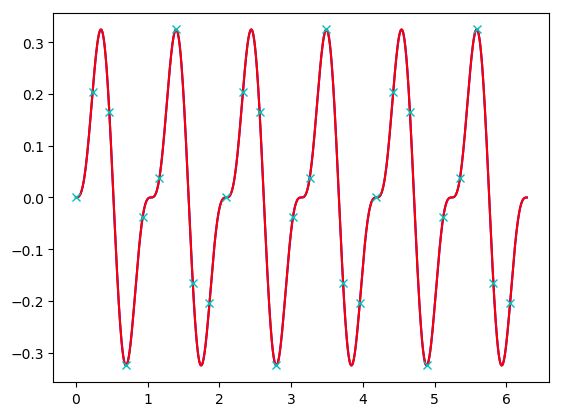

[-2.47686e-18, -0.0687686, 0.343315, -0.469554, 0.199316, 0.0377974, 0.0259378, 0.0444503, -0.317157, 0.19384, 0.205045, -0.150324, -0.0829919, -0.122985, 0.181892, 0.330052, -0.490001, 0.0667873, -0.0607536, 0.293316, 0.178097, -0.647761, 0.256521, -0.00279924, 0.357129, -0.142681, -0.516838]


In [10]:
using PyPlot

f(x) = cos(3*x).*sin(3*x).^3 #(sin.(2π*x)+ sin.((2π*x).^2))


#generate data to interpolate
N=27
x=linspace(0,2π-2π/N,N)
y=f.(x)

z=linspace(0,1,1000)

f_values=Trig_interp(y, z)


plot(2π*z, f_values, "b-")
plot(2π*z, f.(2π*z), "r-")
plot(x, f.(x), "cx")


println( real(f.(x)-Trig_interp(y,x/2π)) )

In [6]:
yh=fft(y)
yhs=fftshift(yh)

27-element Array{Complex{Float64},1}:
 -3.19292e-15-1.31052e-15im
  2.74594e-15-1.6875im     
  7.86022e-17+6.29558e-16im
 -1.66788e-15+4.84304e-16im
  1.11022e-16-2.30756e-15im
  2.80755e-15-1.36795e-15im
  1.31499e-15+2.14576e-15im
  -2.7125e-15+3.375im      
  1.04043e-15-3.68334e-16im
  1.93816e-15+8.98965e-16im
 -1.32241e-46+1.09336e-15im
 -1.61982e-15+2.12213e-15im
 -6.99112e-16-1.20311e-15im
             ⋮             
 -1.61982e-15-2.12213e-15im
 -1.32241e-46-1.09336e-15im
  1.93816e-15-8.98965e-16im
  1.04043e-15+3.68334e-16im
  -2.7125e-15-3.375im      
  1.31499e-15-2.14576e-15im
  2.80755e-15+1.36795e-15im
  1.11022e-16+2.30756e-15im
 -1.66788e-15-4.84304e-16im
  7.86022e-17-6.29558e-16im
  2.74594e-15+1.6875im     
 -3.19292e-15+1.31052e-15im

#### Periodic tiling and Gibb's phenomenon


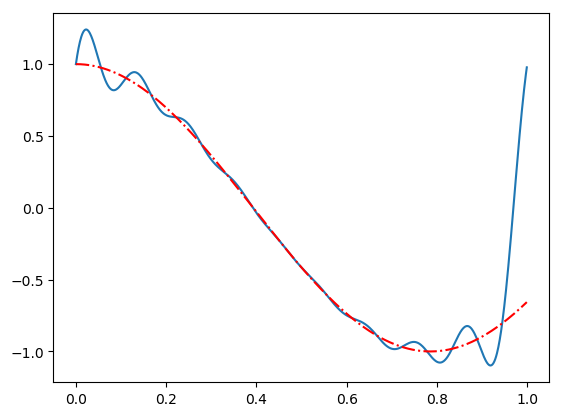

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140c71e50>

In [127]:
f(x) = cos(4x)

#generate data to interpolate
N=18
x=linspace(0,1-1/N,N)
y=f.(x)

z=linspace(0,1-1/1000,1000)
f_int=Trig_interp(y, z)

plot(z, f_int)
plot(z, f.(z), "r-.")

# Error in trigonometric interpolation

Follow: GGK 4.4.3

Delineate three different but related concepts:

* $\hat{f}(k)$ in the Fourier series of $f$
* $\hat{f}_n(k)$ in the finite sum computed by FFT
* Trigogometric interpolant of $f$

Theorem: $$|f(x)-f_{int}^{2N}(x)|\le 2\sum_{|k|\ge{N}} |\hat{f}(k)|$$


Punch lines: 

* **The accuracy of the trig. interpolation depends on how fast the fourier coefficients decay**
* The smoother the funciton is, the faster its Fourier coefficients decay.
